In [1]:
from sympy import *
from itertools import *
import LieSympy as lp
import numpy as np
init_printing()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [11]:
x = symbols('x')
u = Function('u')('x')
phi = Function('varphi')('x')

a = symbols('a')
b = symbols('b')
psi = symbols('psi')

dphi = symbols('d\\varphi')
dx = symbols('dx')

In [3]:
F = Matrix([[cos(phi),-sin(phi)],[sin(phi),cos(phi)]])

R = Matrix([[cos(psi),-sin(psi)],[sin(psi),cos(psi)]])

z = Matrix([x,u])
v = Matrix([a,b])

In [6]:
X = simplify((R*z+v).row(0)[0])
U = simplify((R*z+v).row(1)[0])
F_new = R*F

Dx = diff(X,x)
U_x = simplify(diff(U,x)/Dx)
U_xx = diff(U_x,x)/Dx

F_new_x = diff(F_new,x)/Dx
F_new_xx = diff(F_new_x,x)/Dx

identity = {a:0, b:0, psi:0}
frame = {a:-(F.transpose()*z)[0,0], b:-(F.transpose()*z)[1,0], psi:-phi}

# Basic Contact form $\theta^\varphi$

In [12]:
F_x = simplify(diff(F)*F.inv())

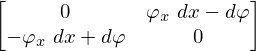

In [148]:
dF = Matrix([[0,-dphi],[dphi,0]])
(dF - F_x*dx).subs({diff(phi,x):symbols('\\ \\varphi_x\\')})

In [206]:
A = [['x'],['u','varphi']]
n = 2
A_flat = [item for sublist in A for item in sublist]
A_jet = [lp.str_usc(A, p) for p in lp.fullJet(A[0], A[1], n-1)]
A_jet_no_underscore = lp.fullJet(A[0], A[1], n-1)
S = [lp.str_sym(A, n), lp.reverse_dict(lp.str_sym(A, n)), lp.str_fun(A, n), lp.reverse_dict(lp.str_fun(A, n)), lp.sym_fun(A, n), lp.reverse_dict(lp.sym_fun(A, n))]
diff_symbs = [symbols('d' + c, commutative=False) for c in A_flat]

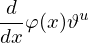

In [208]:
v = [-symbols('u'), x, symbols('phi')]
v1 = lp.Prolong([['x'],['u','varphi']],v,1)
w = [-diff(phi,x), 0, 1]
Lie_derivative(lp.Prolong([['x'],['u','varphi']],v,1),w)

# Infinitesimal generator $v_3$

In [238]:
F11 = Function('F11')('x')
F12 = Function('F12')('x')
F21 = Function('F21')('x')
F22 = Function('F22')('x')

F11_x = Function('F11_x')('x')
F12_x = Function('F12_x')('x')
F21_x = Function('F21_x')('x')
F22_x = Function('F22_x')('x')

d11 = symbols('d_{F_{11}}')
d12 = symbols('d_{F_{12}}')
d21 = symbols('d_{F_{21}}')
d22 = symbols('d_{F_{22}}')

v1 = [-symbols('u'),x,-symbols('F21'),-symbols('F22'),symbols('F11'),symbols('F12')]

A = [['x'], ['u','F11','F12','F21','F22']]

In [239]:
pr_v1 = lp.Prolong(A, v1, 1)
pr_v1

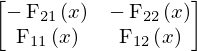

In [150]:
Matrix([pr_v1[2:4],pr_v1[4:6]])

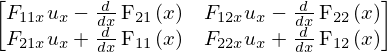

In [151]:
Matrix([pr_v1[7:9],pr_v1[9:11]])

In [66]:
B = Matrix([[F11,F12],[F21,F22]])

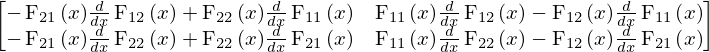

In [309]:
T1 = diff(B,x)*(B.inv()).subs({F11*F22-F12*F21:1, diff(F11,x):d11, diff(F12,x):d12, diff(F21,x):d21, diff(F22,x):d22})
T1

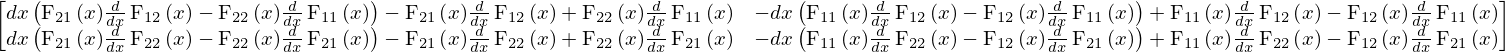

In [279]:
T2 = simplify(diff(B,x)*(B.inv())).subs({F11*F22-F12*F21:1})
simplify(T1-T2*dx)

In [328]:
temp = simplify(T1.subs({diff(F11,x):symbols('\\ dF_11'),diff(F12,x):symbols('\\ dF_12'),diff(F21,x):symbols('\\ dF_21'),diff(F22,x):symbols('\\ dF_22')}).subs({F11:symbols('F_11'),F12:symbols('F_12'),F21:symbols('F_21'),F22:symbols('F_22')}))

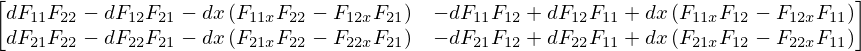

In [349]:
simplify(temp-(T2.subs({diff(F11,x):symbols('\\ F_{11x}'), diff(F12,x):symbols('\\ F_{12x}'), diff(F21,x):symbols('\\ F_{21x}'), diff(F22,x):symbols('\\ F_{22x}')})).subs({F11:symbols('F_11'),F12:symbols('F_12'),F21:symbols('F_21'),F22:symbols('F_22')})*dx)

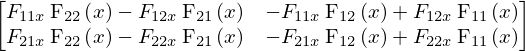

In [346]:
T2.xreplace({diff(F11,x):symbols('F_{11x}'), diff(F12,x):symbols('F_{12x}'), diff(F21,x):symbols('F_{21x}'), diff(F22,x):symbols('F_{22x}')})

In [345]:
symbols('F_11x')

# Lie Derivatives

In [212]:
A = [['x'],['u','F11','F12','F21','F22']]
n = 2
A_flat = [item for sublist in A for item in sublist]
A_jet = [lp.str_usc(A, p) for p in lp.fullJet(A[0], A[1], n-1)]
A_jet_no_underscore = lp.fullJet(A[0], A[1], n-1)
S = [lp.str_sym(A, n), lp.reverse_dict(lp.str_sym(A, n)), lp.str_fun(A, n), lp.reverse_dict(lp.str_fun(A, n)), lp.sym_fun(A, n), lp.reverse_dict(lp.sym_fun(A, n))]
diff_symbs = [symbols('d' + c, commutative=False) for c in A_flat]

In [267]:
def interior_prod(v,w):
    return [simplify(w[i]*v[i]) for i in range(len(w))]

def ext_diff(f):
    return [diff(f,symbols(var)) for var in A_jet]

def two_form_diff(w):
    C = []
    for i in range(len(A_jet)):
        vec = w+[0 for j in range(len(A_jet)-len(w))]
        temp = [diff(vec[i], symbols(var)) for var in A_jet]
        temp[i] = 0
        C.append(temp)
    return Matrix(C)-Matrix(C).transpose()

def int_two_prod(v,w):
    W = [0 for i in range(len(A_jet))]
    O = two_form_diff(w).transpose()
    for i in range(len(W)):
        W[i] = -sum(interior_prod(v,O[i,:]))
    return W

def Lie_derivative(v,w):
    temp = [simplify(c+d) for c,d in zip(ext_diff(sum(interior_prod(v,w))),int_two_prod(v,w))]
    symbs = lp.Contact_sym(A, n)
    for i in range(1,len(symbs)):
        symbs[i] = symbols(str(symbs[i]),commutative=False)
    return sum([c*d for c,d in zip(temp, symbs)])

In [268]:
w = [symbols('F21')*symbols('F22_x')-symbols('F22')*symbols('F21_x'), 0, 0, symbols('F22'), 0, -symbols('F21')]

In [269]:
Lie_derivative(pr_v1,w)

In [99]:
pr_v1

In [270]:
int_two_prod(pr_v1,w)

In [242]:
pr_v1

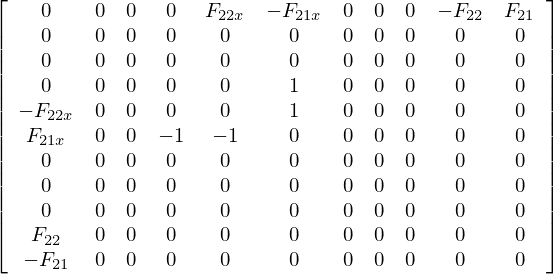

In [271]:
two_form_diff(w)

In [275]:
ext_diff(sum(interior_prod(pr_v1,w)))

In [276]:
[(a-b) for a,b in zip(int_two_prod(pr_v1,w),ext_diff(sum(interior_prod(pr_v1,w))))]

# Lie derivative of w1

In [297]:
w = [symbols('F12')*symbols('F11_x')-symbols('F11')*symbols('F12_x'), 0, -symbols('F12'), 0, symbols('F11'), 0]

In [298]:
Lie_derivative(pr_v1,w)

In [299]:
Lie_derivative(pr_v1,w).subs({symbols('F11_x'):-sin(phi),symbols('F12_x'):-cos(phi),symbols('F21_x'):cos(phi),symbols('F22_x'):-sin(phi)}).subs({symbols('F11'):cos(phi),symbols('F12'):-sin(phi),symbols('F21'):sin(phi),symbols('F22'):cos(phi)})

In [300]:
w = [symbols('F21')*symbols('F22_x')-symbols('F22')*symbols('F21_x'), 0, 0, symbols('F22'), 0, -symbols('F21')]

In [312]:
Lie_derivative(pr_v1,w)

In [294]:
Lie_derivative(pr_v1,w).subs({symbols('F11_x'):-sin(phi),symbols('F12_x'):-cos(phi),symbols('F21_x'):cos(phi),symbols('F22_x'):-sin(phi)}).subs({symbols('F11'):cos(phi),symbols('F12'):-sin(phi),symbols('F21'):sin(phi),symbols('F22'):cos(phi)})

# Testing The Lie derivative

In [314]:
w = [symbols('F12')*symbols('F11_x')-symbols('F11')*symbols('F12_x'), 0, -symbols('F12'), 0, symbols('F11'), 0]
[simplify(c+d) for c,d in zip(ext_diff(sum(interior_prod(pr_v1,w))),int_two_prod(pr_v1,w))]

In [315]:
Lie_derivative(pr_v1,w)

In [352]:
w = [symbols('F21')*symbols('F22_x')-symbols('F22')*symbols('F21_x'), 0, 0, 0, symbols('F22'), -symbols('F21')]
[simplify(c+d) for c,d in zip(ext_diff(sum(interior_prod(pr_v1,w))),int_two_prod(pr_v1,w))]

In [313]:
Lie_derivative(pr_v1,w)

In [353]:
Lie_derivative(pr_v1,w).subs({symbols('F11_x'):-sin(phi),symbols('F12_x'):-cos(phi),symbols('F21_x'):cos(phi),symbols('F22_x'):-sin(phi)}).subs({symbols('F11'):cos(phi),symbols('F12'):-sin(phi),symbols('F21'):sin(phi),symbols('F22'):cos(phi)})

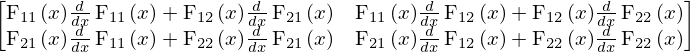

In [371]:
B*diff(B,x)

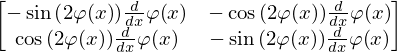

In [379]:
simplify(F*diff(F,x))

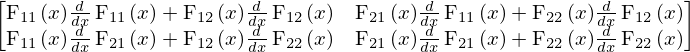

In [372]:
diff(B,x)*B.transpose()

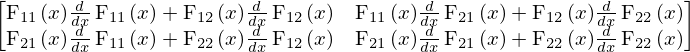

In [373]:
B*(diff(B,x).transpose())